In [1]:
import numpy as np 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns
import os, sys 
import numpy as np 
import cupy as cp 
from tensorflow.keras.datasets.mnist import load_data as load_mnist
from tensorflow.keras.datasets.cifar10 import load_data as load_cifar
sys.path.append('/home/oneran/机器学习课设/cifar-10/Photon')
from layers import * 
from ResidualModel import * 
from Model import * 
from DenseNet import *
from optimizers import * 
from utils import * 
import matplotlib.pyplot as plt
sns.set_theme()

## 必要函数

In [2]:
def plot_roc_curve(fper, tper, classes, save_dir, i, label):
    plt.subplot(4, 3, i+1)
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positiselfe Rate')
    plt.title('Class: {} Receiver Operating Characteristic Curve'.format(label))
    plt.legend()

def plots_all_roc(Y_test, pred, classes, savedir, labels):
    '''
    Y_test MUST BE 1-d array
    Pred MUST BE multi-categorical
    '''
    plt.figure(figsize=(21, 28))
    for i in range(classes):
        fpr, tpr, thersholds = roc_curve(np.where(Y_test == i, 1, 0), pred[:, i])
        plot_roc_curve(fpr, tpr, i, savedir, i, labels[i])
    plt.savefig(savedir+'.png')

def softmax(x):
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

def to_GPU(X):
    return cp.array(X)

def to_CPU(X):
    return cp.asnumpy(X) 

## 验证几个神经网络 
- Mnist (Using SGD+Monument)
  - Convolution Network
  - Residual Convolution Network
  - Simple DNN 
- CIFAR-10 (Using SGD+Monument)
  - Convolution Network
  - Residual Convolution Network
  - Simple DNN
- CIFAR-10 (Using RMSprop)
  - Convolution Network
  - Residual Convolution Network
  - Simple DNN

In [3]:
(X_train, Y_train), (X_test, Y_test) = load_mnist()
print(X_train.shape, Y_train.shape)

def to_category(labels, classes=10):
    categories = np.zeros((len(labels), classes)) 
    for i in range(len(categories)):
        categories[i, labels[i]] = 1
    return categories

if X_train.shape[0] == 50000:
    data = X_train / 255.
    label = to_category(Y_train, 10)
else:
    data = np.expand_dims(X_train / 255., axis=-1)
    label = to_category(Y_train, 10)

(60000, 28, 28) (60000,)


## Mnist-ConvNet

Score is 0.9624399038461539


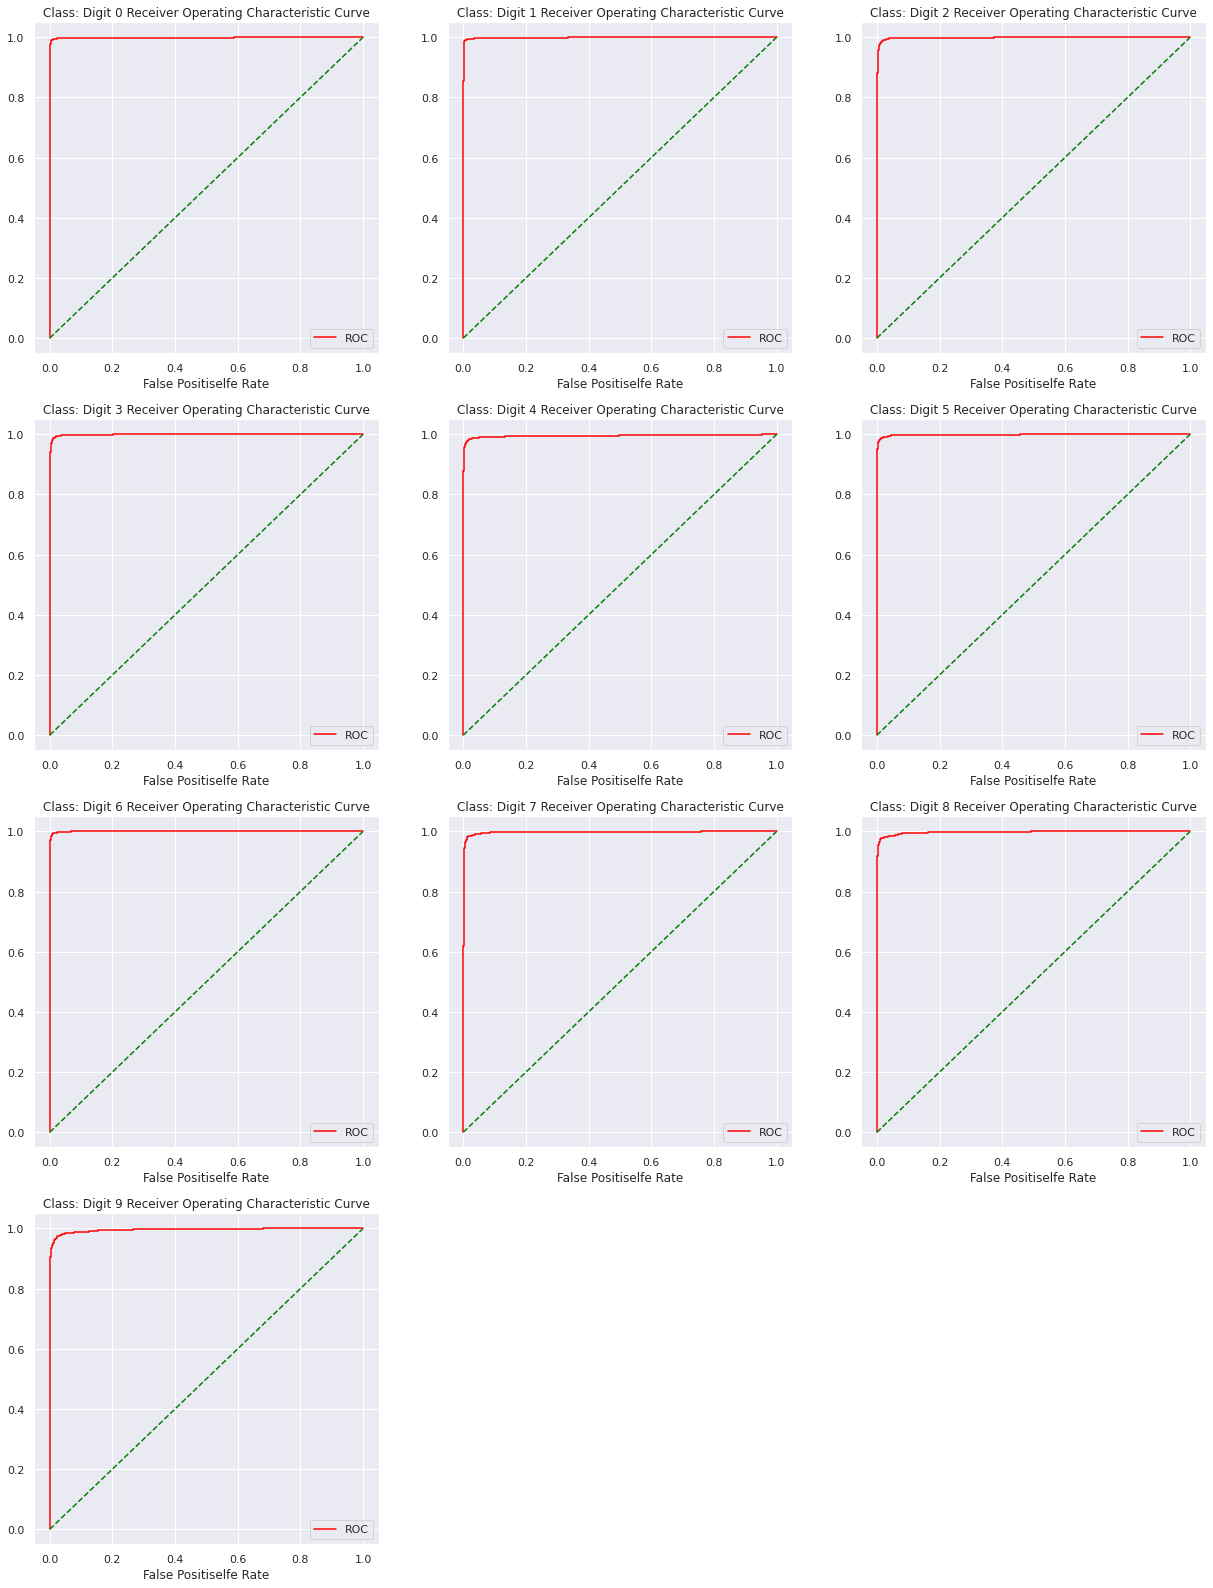

In [4]:
model = ConvNet(datasets='mnist', opt='sgd')
labels = ['Digit 0', 'Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5', 'Digit 6', 'Digit 7', 'Digit 8', 'Digit 9']
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_ConvNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/Mnist-ConvNet', labels)

## Mnist-ResNet

Score is 0.9694511217948718


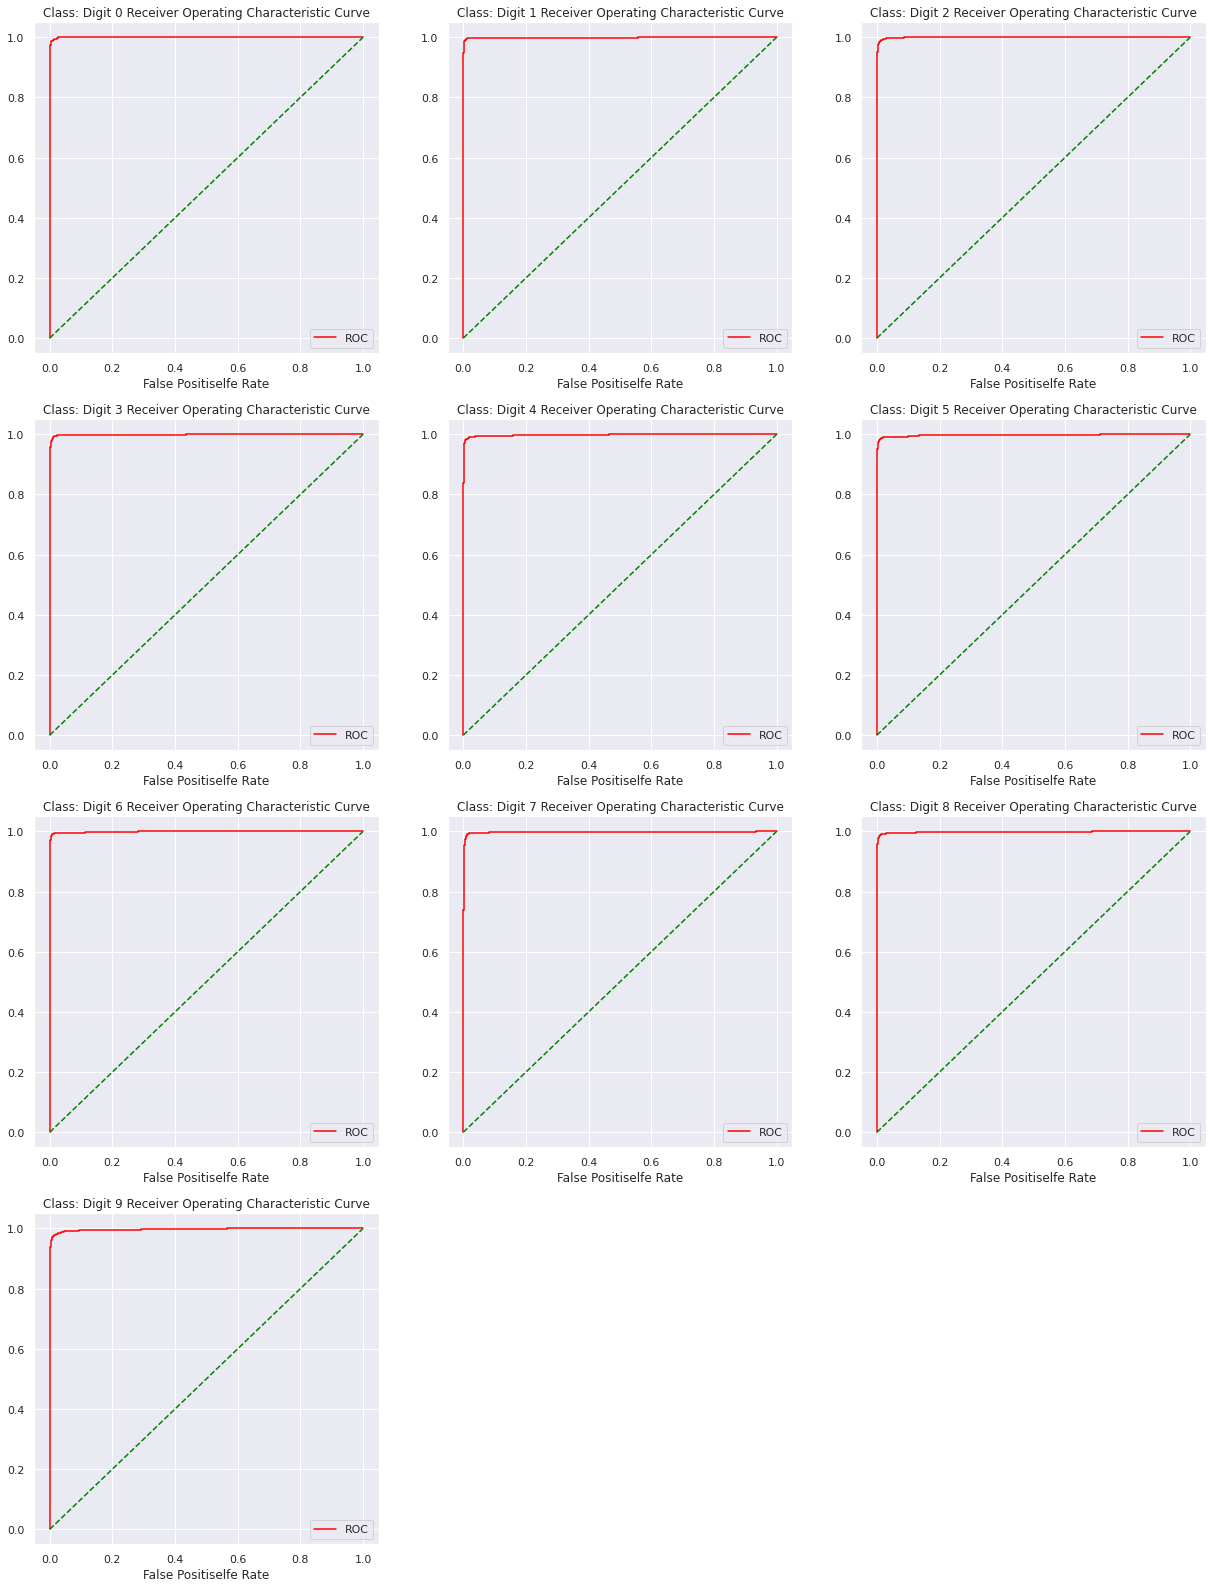

In [5]:
model = ResNet(datasets='mnist', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_ResNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/Mnist-ResNet', labels)

## Mnist-DenseNet

Score is 0.9567307692307693


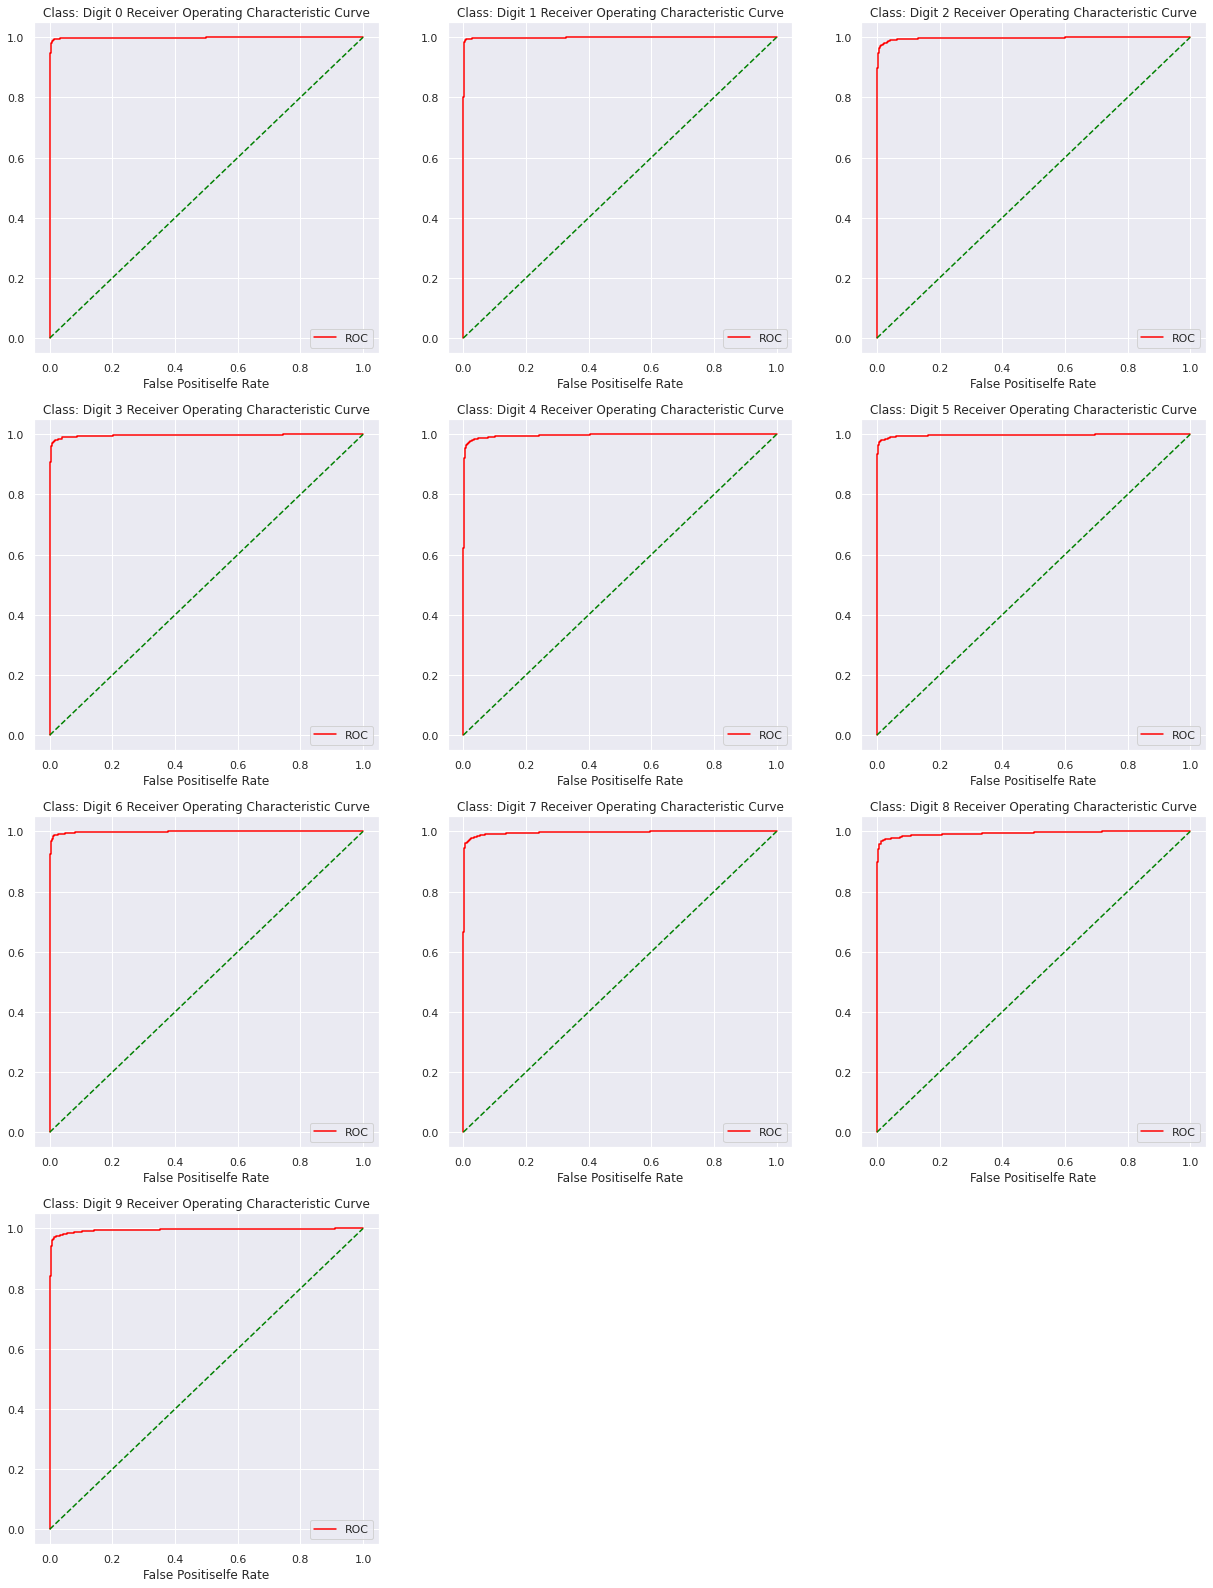

In [6]:
model = DenseNet(datasets='mnist', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_mnist_DenseNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/Mnist-DenseNet', labels)

# CIFAR

In [7]:
(X_train, Y_train), (X_test, Y_test) = load_cifar()
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 1)


## ConvNet-SGD

Score is 0.5022035256410257


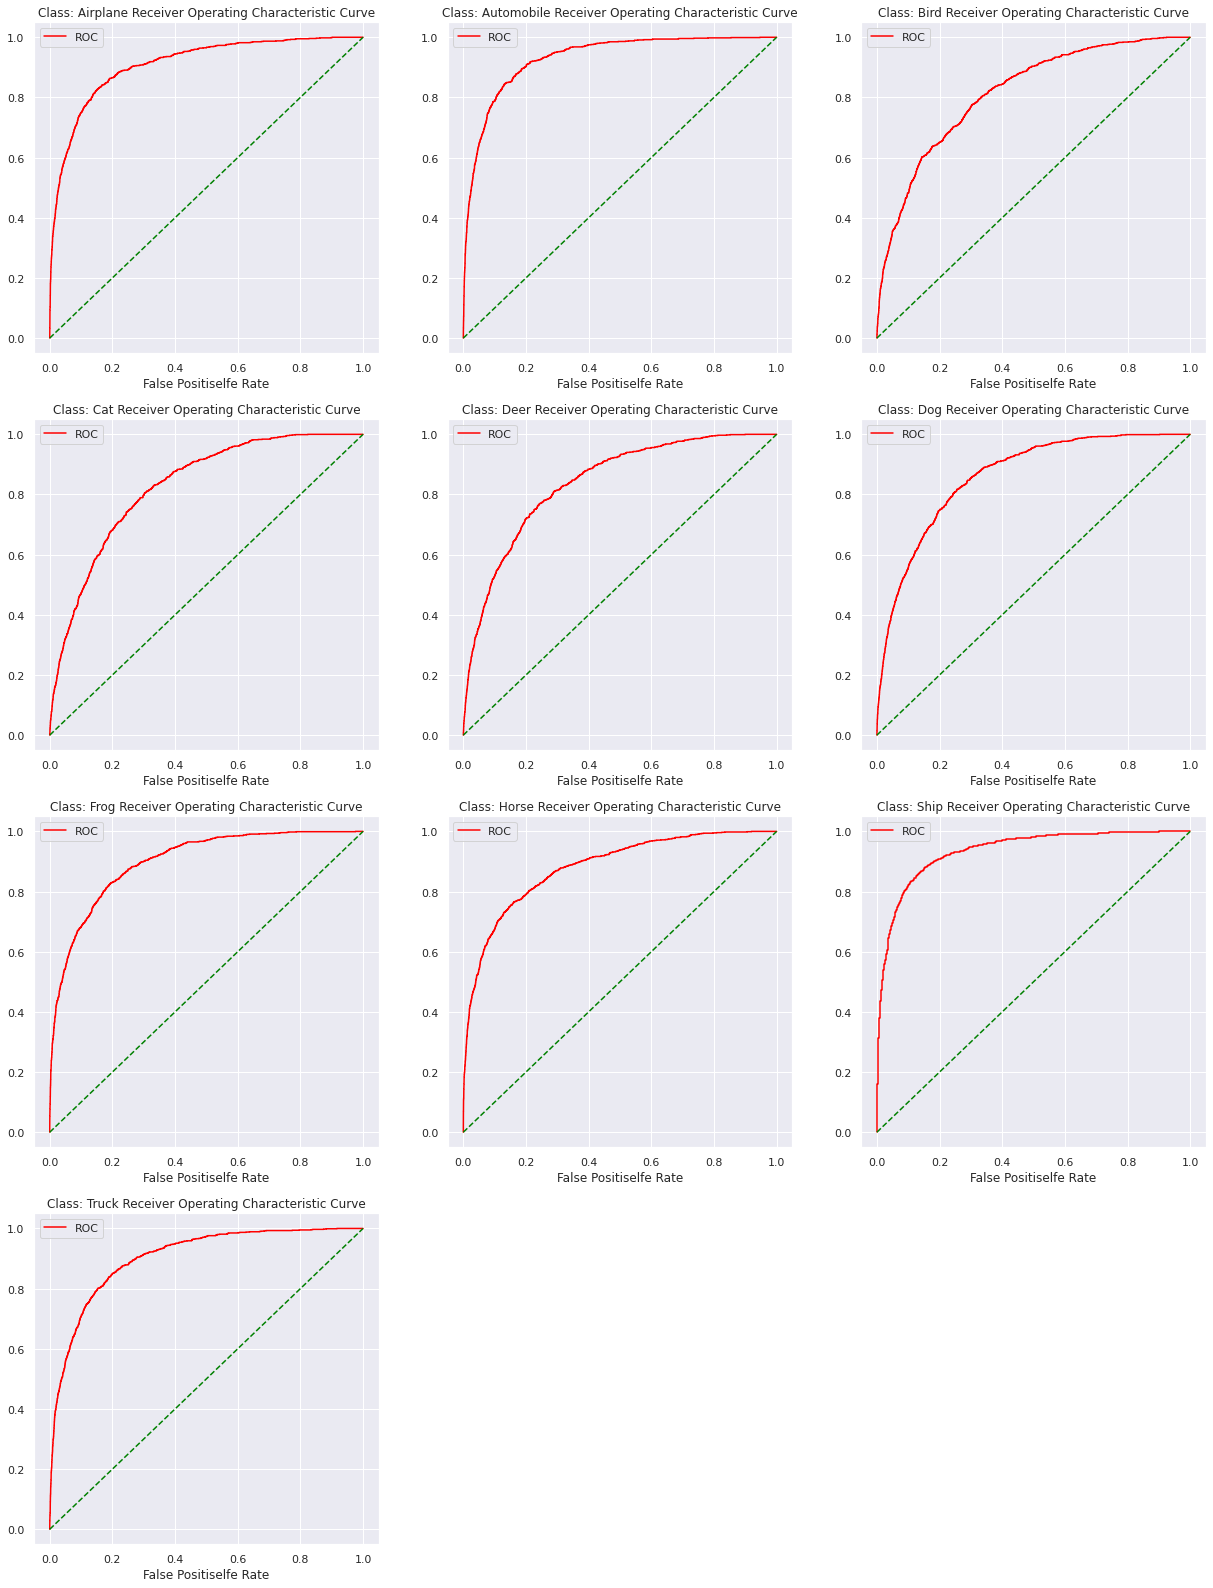

In [9]:
model = ConvNet(datasets='cifar_10', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_ConvNet.pkl')
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-ConvNet-SGD', labels)

## ResNet-SGD

Score is 0.6206931089743589


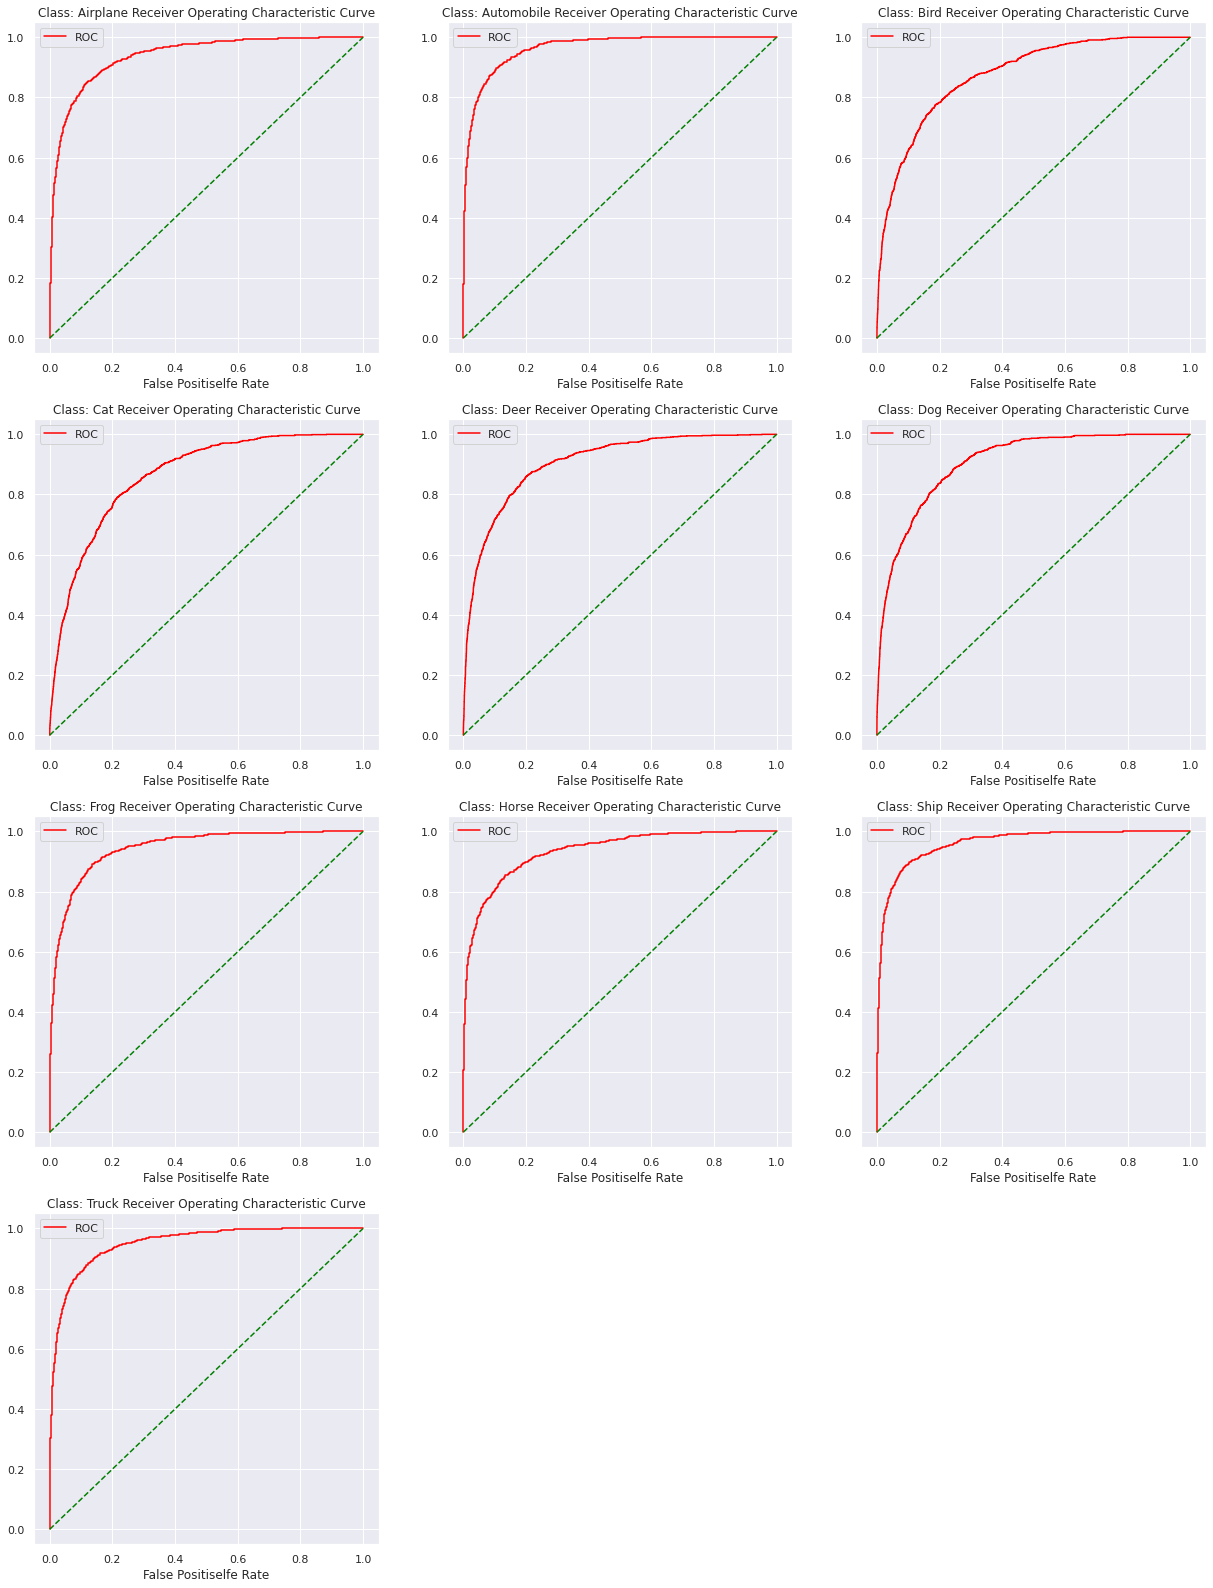

In [11]:
model = ResNet(datasets='cifar_10', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_ResNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-ResNet-SGD', labels)

## DenseNet-SGD

Score is 0.49158653846153844


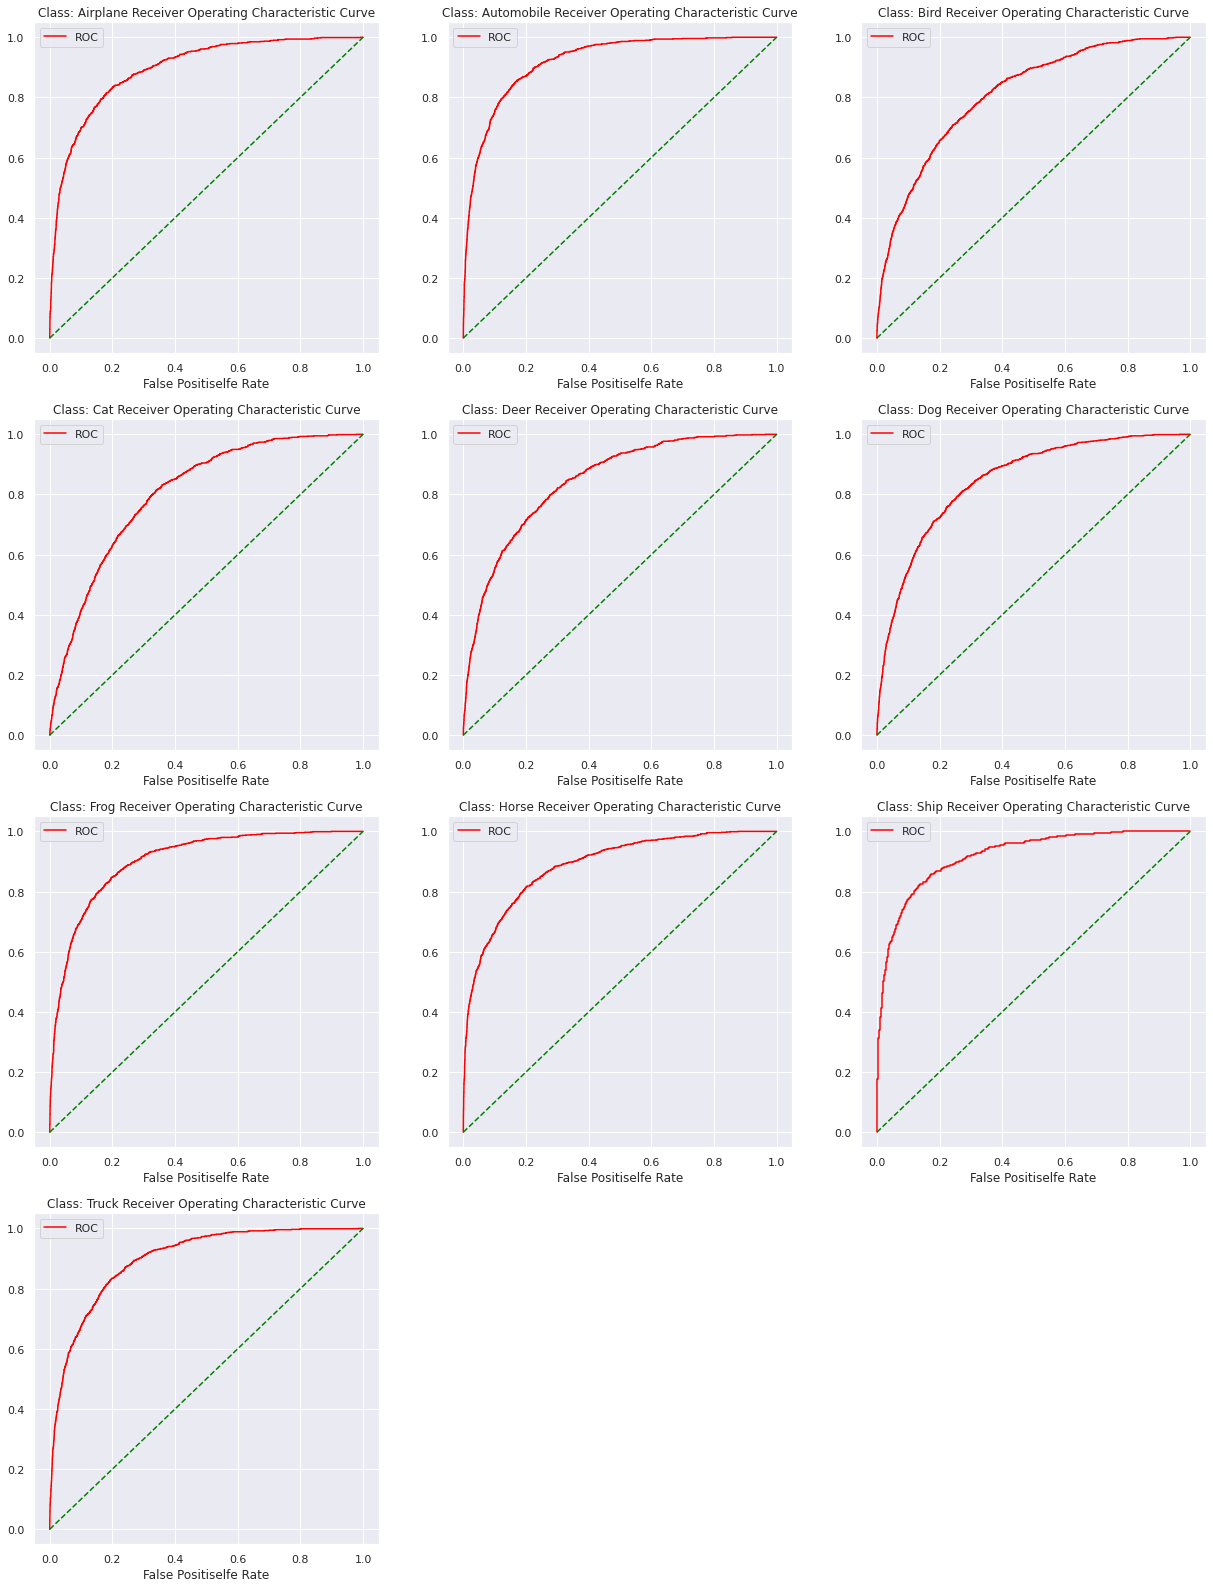

In [12]:
model = DenseNet(datasets='cifar_10', opt='sgd')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/sgd_cifar_DenseNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-DenseNet-SGD', labels)

## ConvNet-RMSprop

Score is 0.5873397435897436


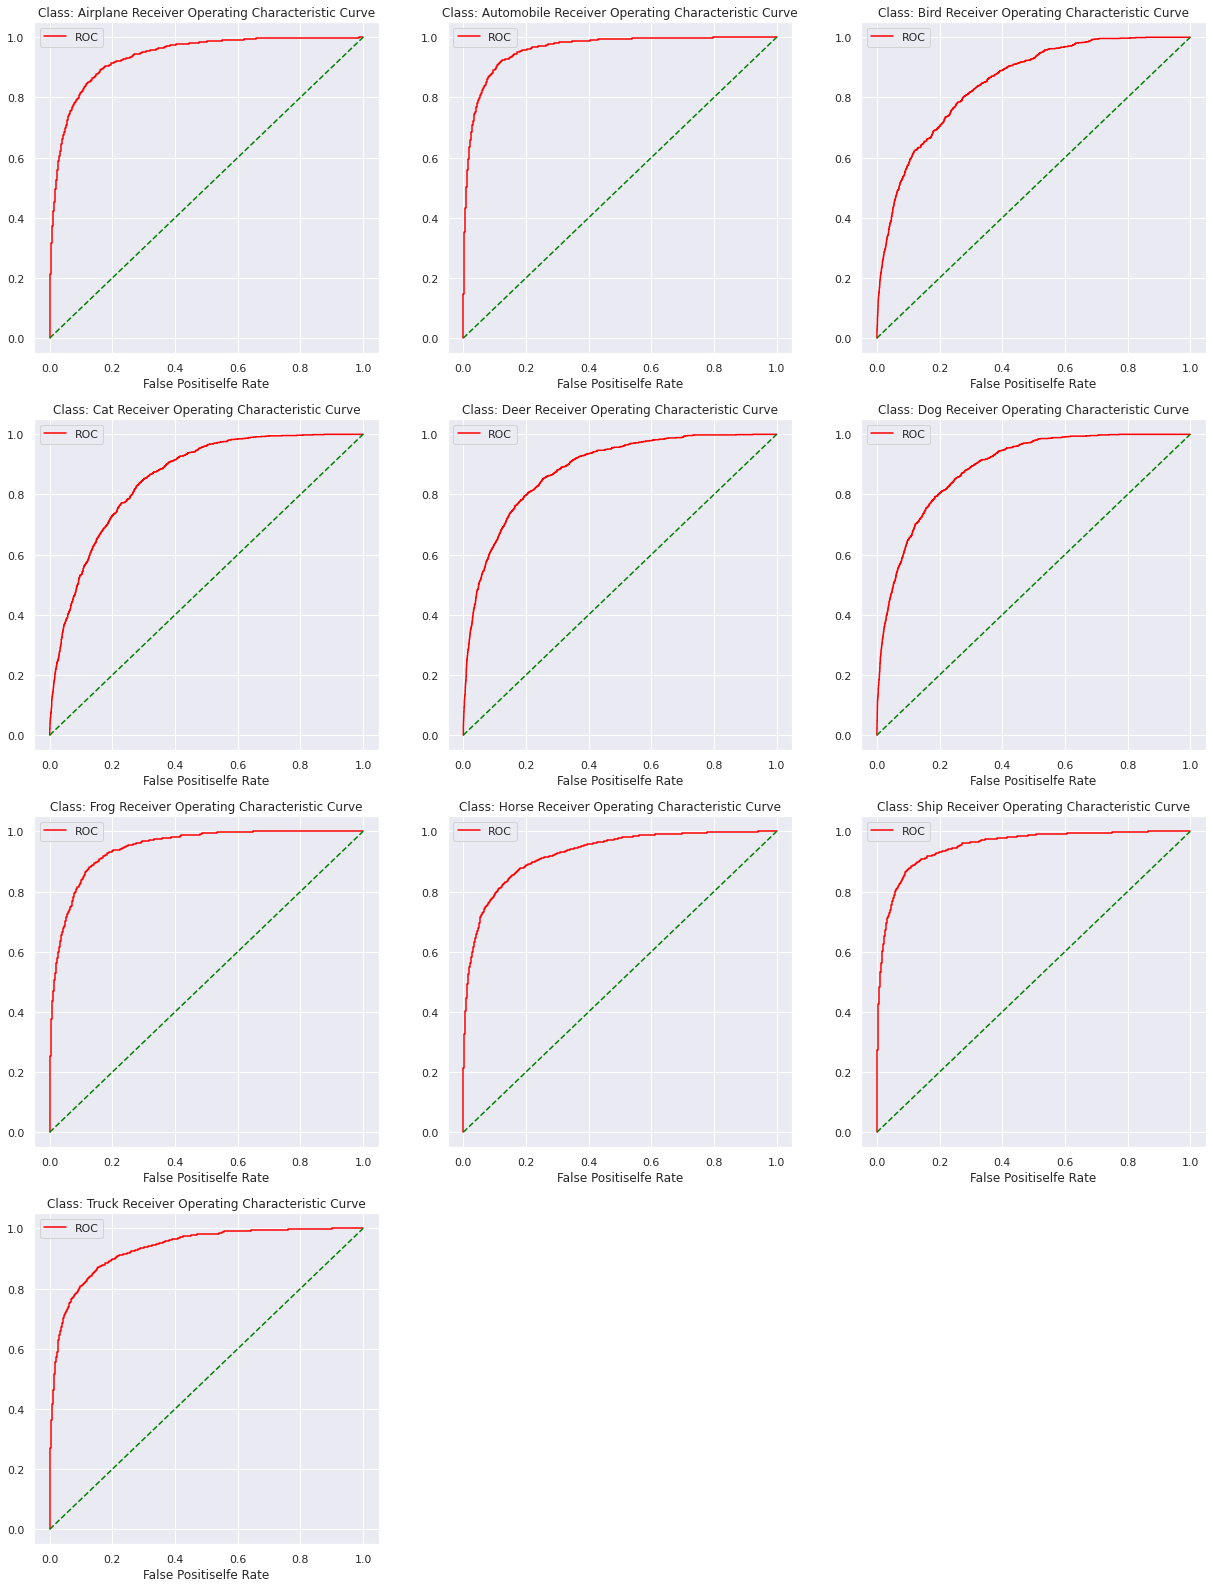

In [13]:
model = ConvNet(datasets='cifar_10', opt='rmsprop')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ConvNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-ConvNet-RMSprop', labels)

## ResNet-RMSprop

Score is 0.6464342948717948


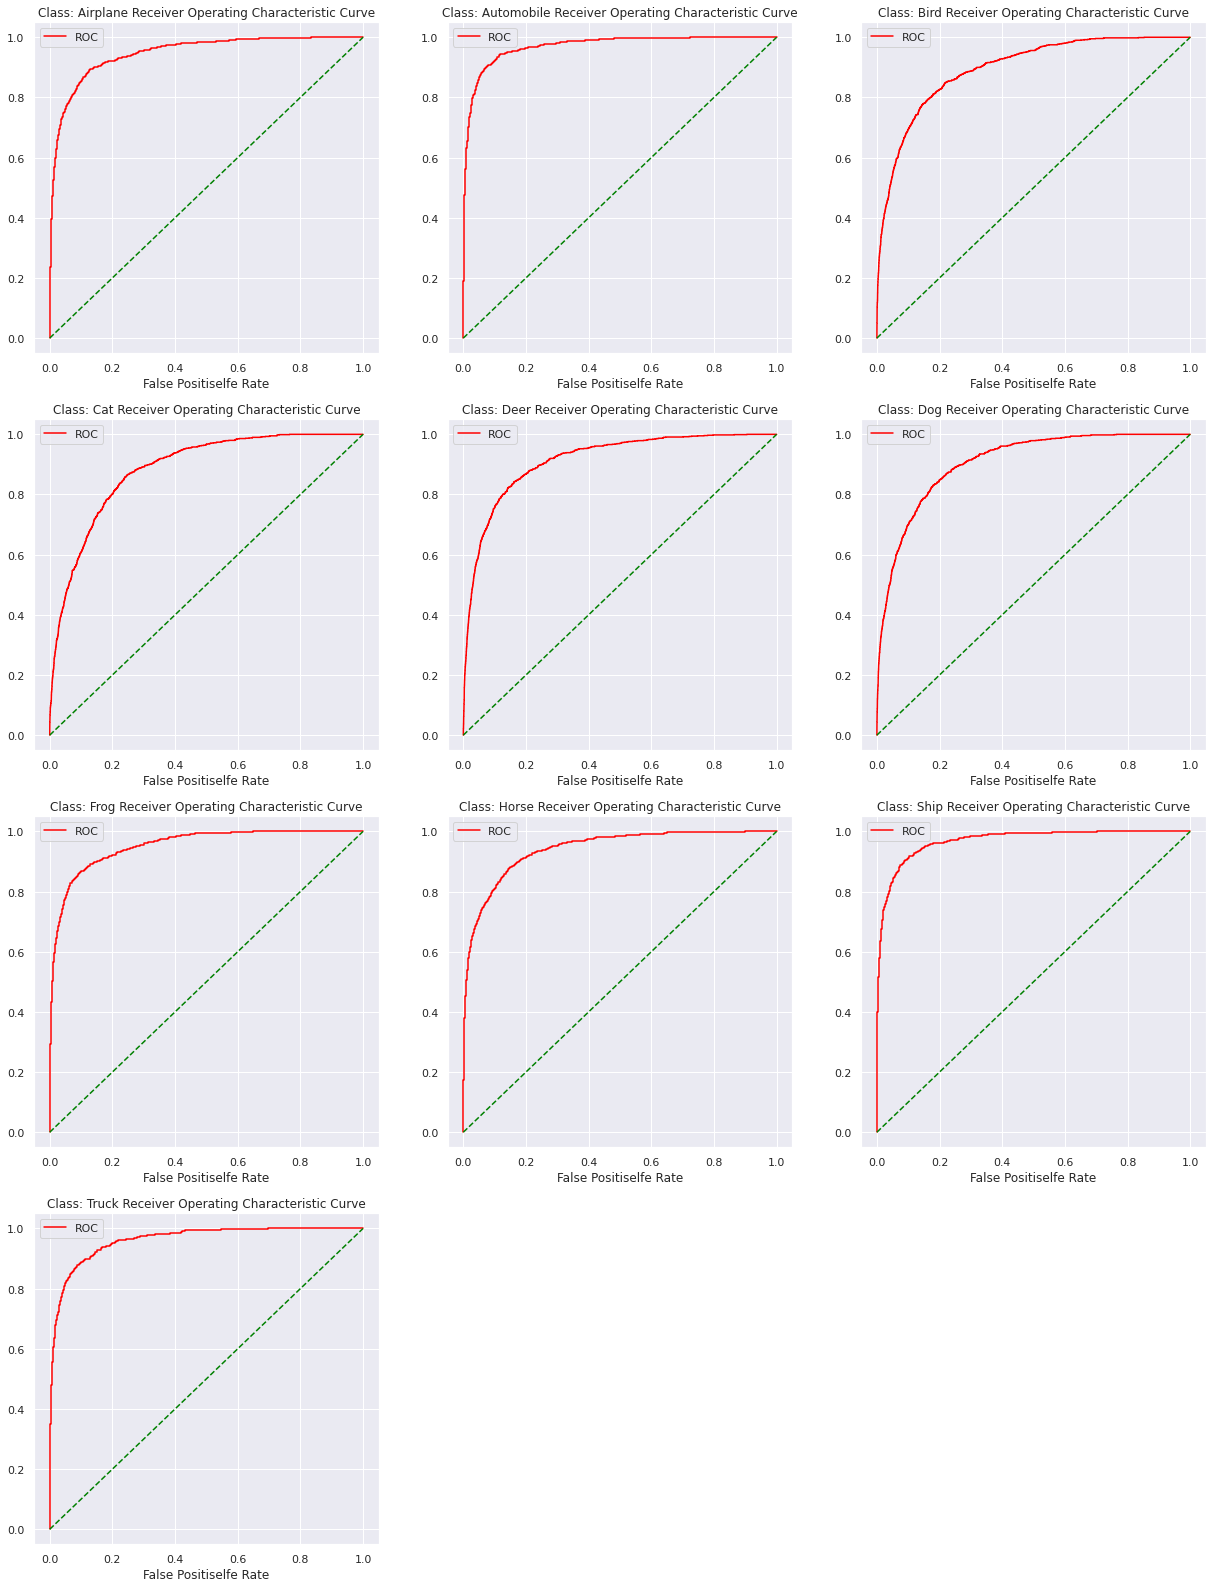

In [14]:
model = ResNet(datasets='cifar_10', opt='rmsprop')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_ResNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-ResNet-RMSprop', labels)

## DenseNet-RMSprop

Score is 0.488681891025641


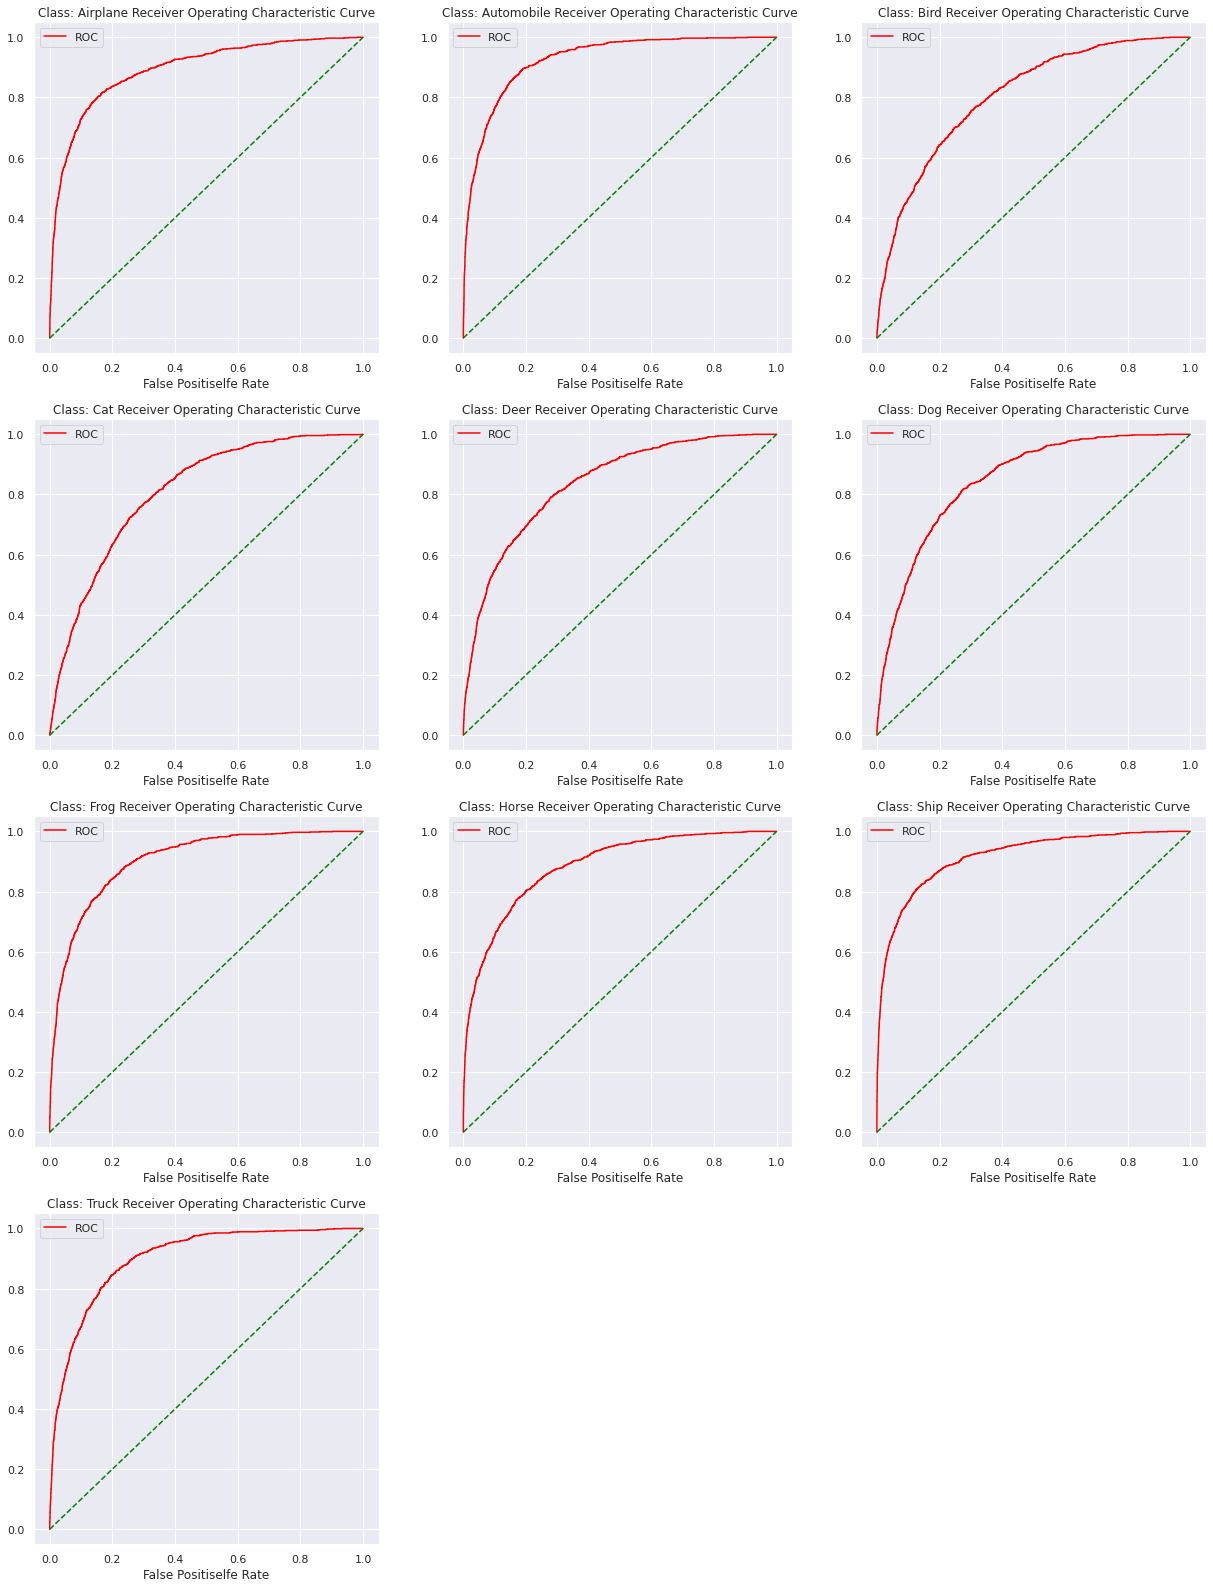

In [15]:
model = DenseNet(datasets='cifar_10', opt='rmsprop')
model.load_model('/home/oneran/机器学习课设/cifar-10/Photon/rmsprop_cifar_DenseNet.pkl')
score, pred = model.score(X_test, Y_test)
pred = softmax(pred)
plots_all_roc(Y_test[:len(pred)].flatten(), pred, 10, '/home/oneran/Documents/ROC/CIFAR-DenseNet-RMSprop', labels)

# 把Loss曲线画一下

In [ ]:
proj_map = {
    'CIFAR-ConvNet-RMSprop': 'rmsprop_cifar_ConvNet_history.txt',
    'CIFAR-DenseNet-RMSprop': 'rmsprop_cifar_DenseNet_history.txt',
    'CIFAR-ResNet-RMSprop': 'rmsprop_cifar_ResNet_history.txt',
    'CIFAR-ConvNet-SGD': 'sgd_cifar_ConvNet_history.txt',
    'CIFAR-DenseNet-SGD': 'sgd_cifar_DenseNet_history.txt',
    'CIFAR-ResNet-SGD': 'sgd_cifar_ResNet_history.txt',
    'Mnist-ConvNet': 'sgd_mnist_ConvNet_history.txt',
    'Mnist-DenseNet': 'sgd_mnist_DenseNet_history.txt',
    'Mnist-ResNet': 'sgd_mnist_ResNet_history.txt',
}
base_path = '/home/oneran/Downloads/'
save_path = '/home/oneran/Documents/ROC'
BATCH_SIZE = 64
def plots_loss(losspath, savepath, steps=1):
    plt.figure()
    loss = np.loadtxt(losspath)
    epochs = np.arange(len(loss)) / BATCH_SIZE
    plt.plot(epochs[::steps], loss[::steps])
    plt.ylim(0, 2.5)
    plt.xlabel('Epoch')
    plt.ylabel('Crossentropy-Loss')
    plt.savefig(savepath)

In [ ]:
for key, value in proj_map.items():
    savepath = save_path + '/{}/Loss.png'.format(key)
    filepath = base_path + '/{}'.format(value)
    plots_loss(filepath, savepath, steps=10)